In [1]:
import pickle
from concurrent.futures import ProcessPoolExecutor, as_completed
from itertools import chain

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/society-ipd-epsilon-0.2.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
THRESHOLDS = [
    0.99,
    0.98,
    0.97,
    0.96,
    0.95,
    0.94,
    0.93,
    0.92,
    0.91,
    0.9,
    0.875,
    0.85,
    0.825,
    0.8,
    0.7,
    0.6,
    0.5,
    0.4,
    0.3,
    0.2,
    0.1,
]

In [4]:
rows = []

with ProcessPoolExecutor(max_workers=6) as pool:
    futures = {
        pool.submit(get_graphs_at_thresholds, weights, THRESHOLDS): (population, lb)
        for (population, lb, t), weights_collection in data["train_weights"].items()
        for weights in weights_collection
    }

    for future in tqdm(as_completed(futures), total=len(futures)):
        population, lb = futures[future]
        Gs, edge_counts, clustering_coefficients = future.result()

        for threshold, edge_count, clustering_coefficient in zip(
            THRESHOLDS, edge_counts, clustering_coefficients
        ):
            rows.append([population, lb, threshold, edge_count, clustering_coefficient])

df = pd.DataFrame(
    rows,
    columns=[
        "population",
        "lookback",
        "threshold",
        "edge_count",
        "clustering_coefficient",
    ],
)

df

  0%|          | 0/600 [00:00<?, ?it/s]

population  lookback  threshold  edge_count  clustering_coefficient
0              16         1       0.99           0                     NaN
1              16         1       0.98           0                     NaN
2              16         1       0.97           0                     NaN
3              16         1       0.96           0                     NaN
4              16         1       0.95           0                     NaN
...           ...       ...        ...         ...                     ...
12595         512         5       0.50       88057                0.703073
12596         512         5       0.40      112712                0.866403
12597         512         5       0.30      119001                0.911715
12598         512         5       0.20      120964                0.925965
12599         512         5       0.10      122224                0.935157

[12600 rows x 5 columns]

In [5]:
df.to_csv("analysis/ipd_clustering_data_epsilon_0.2.csv")

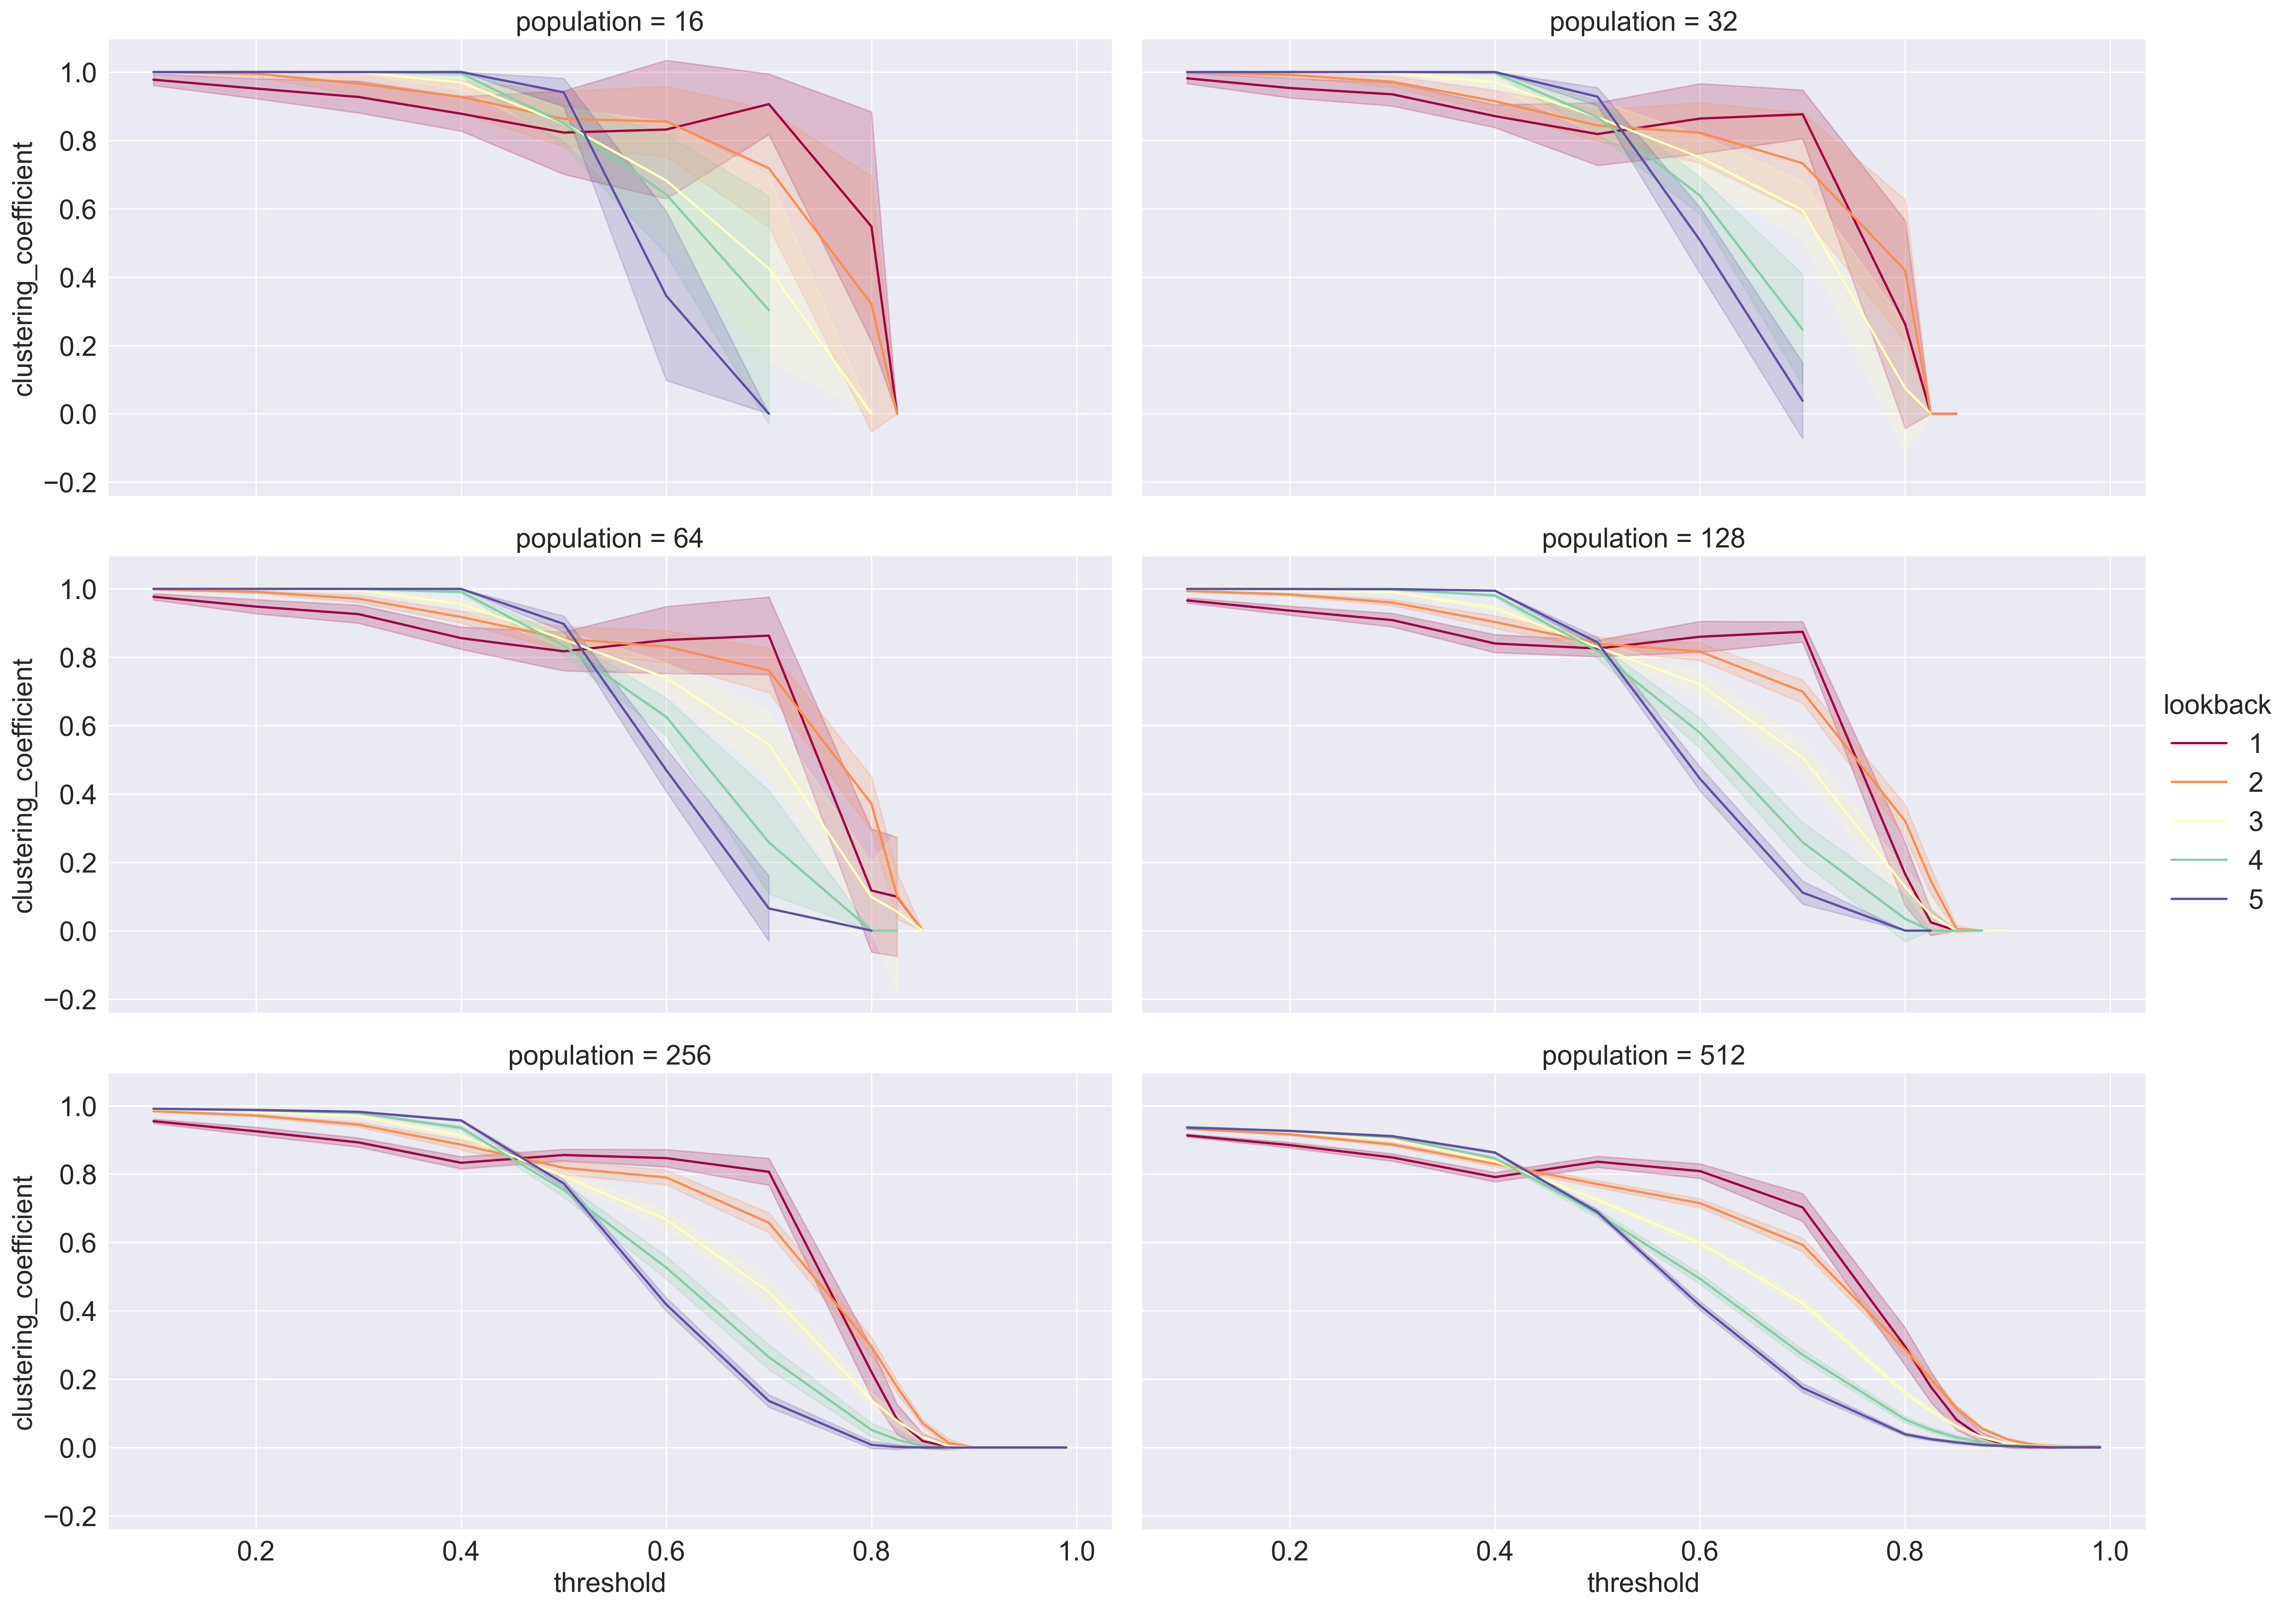

In [6]:
sns.set_style("darkgrid")
sns.relplot(
    data=df,
    x="threshold",
    y="clustering_coefficient",
    hue="lookback",
    col="population",
    col_wrap=2,
    kind="line",
    aspect=2,
    palette="Spectral",
    errorbar="sd",
)

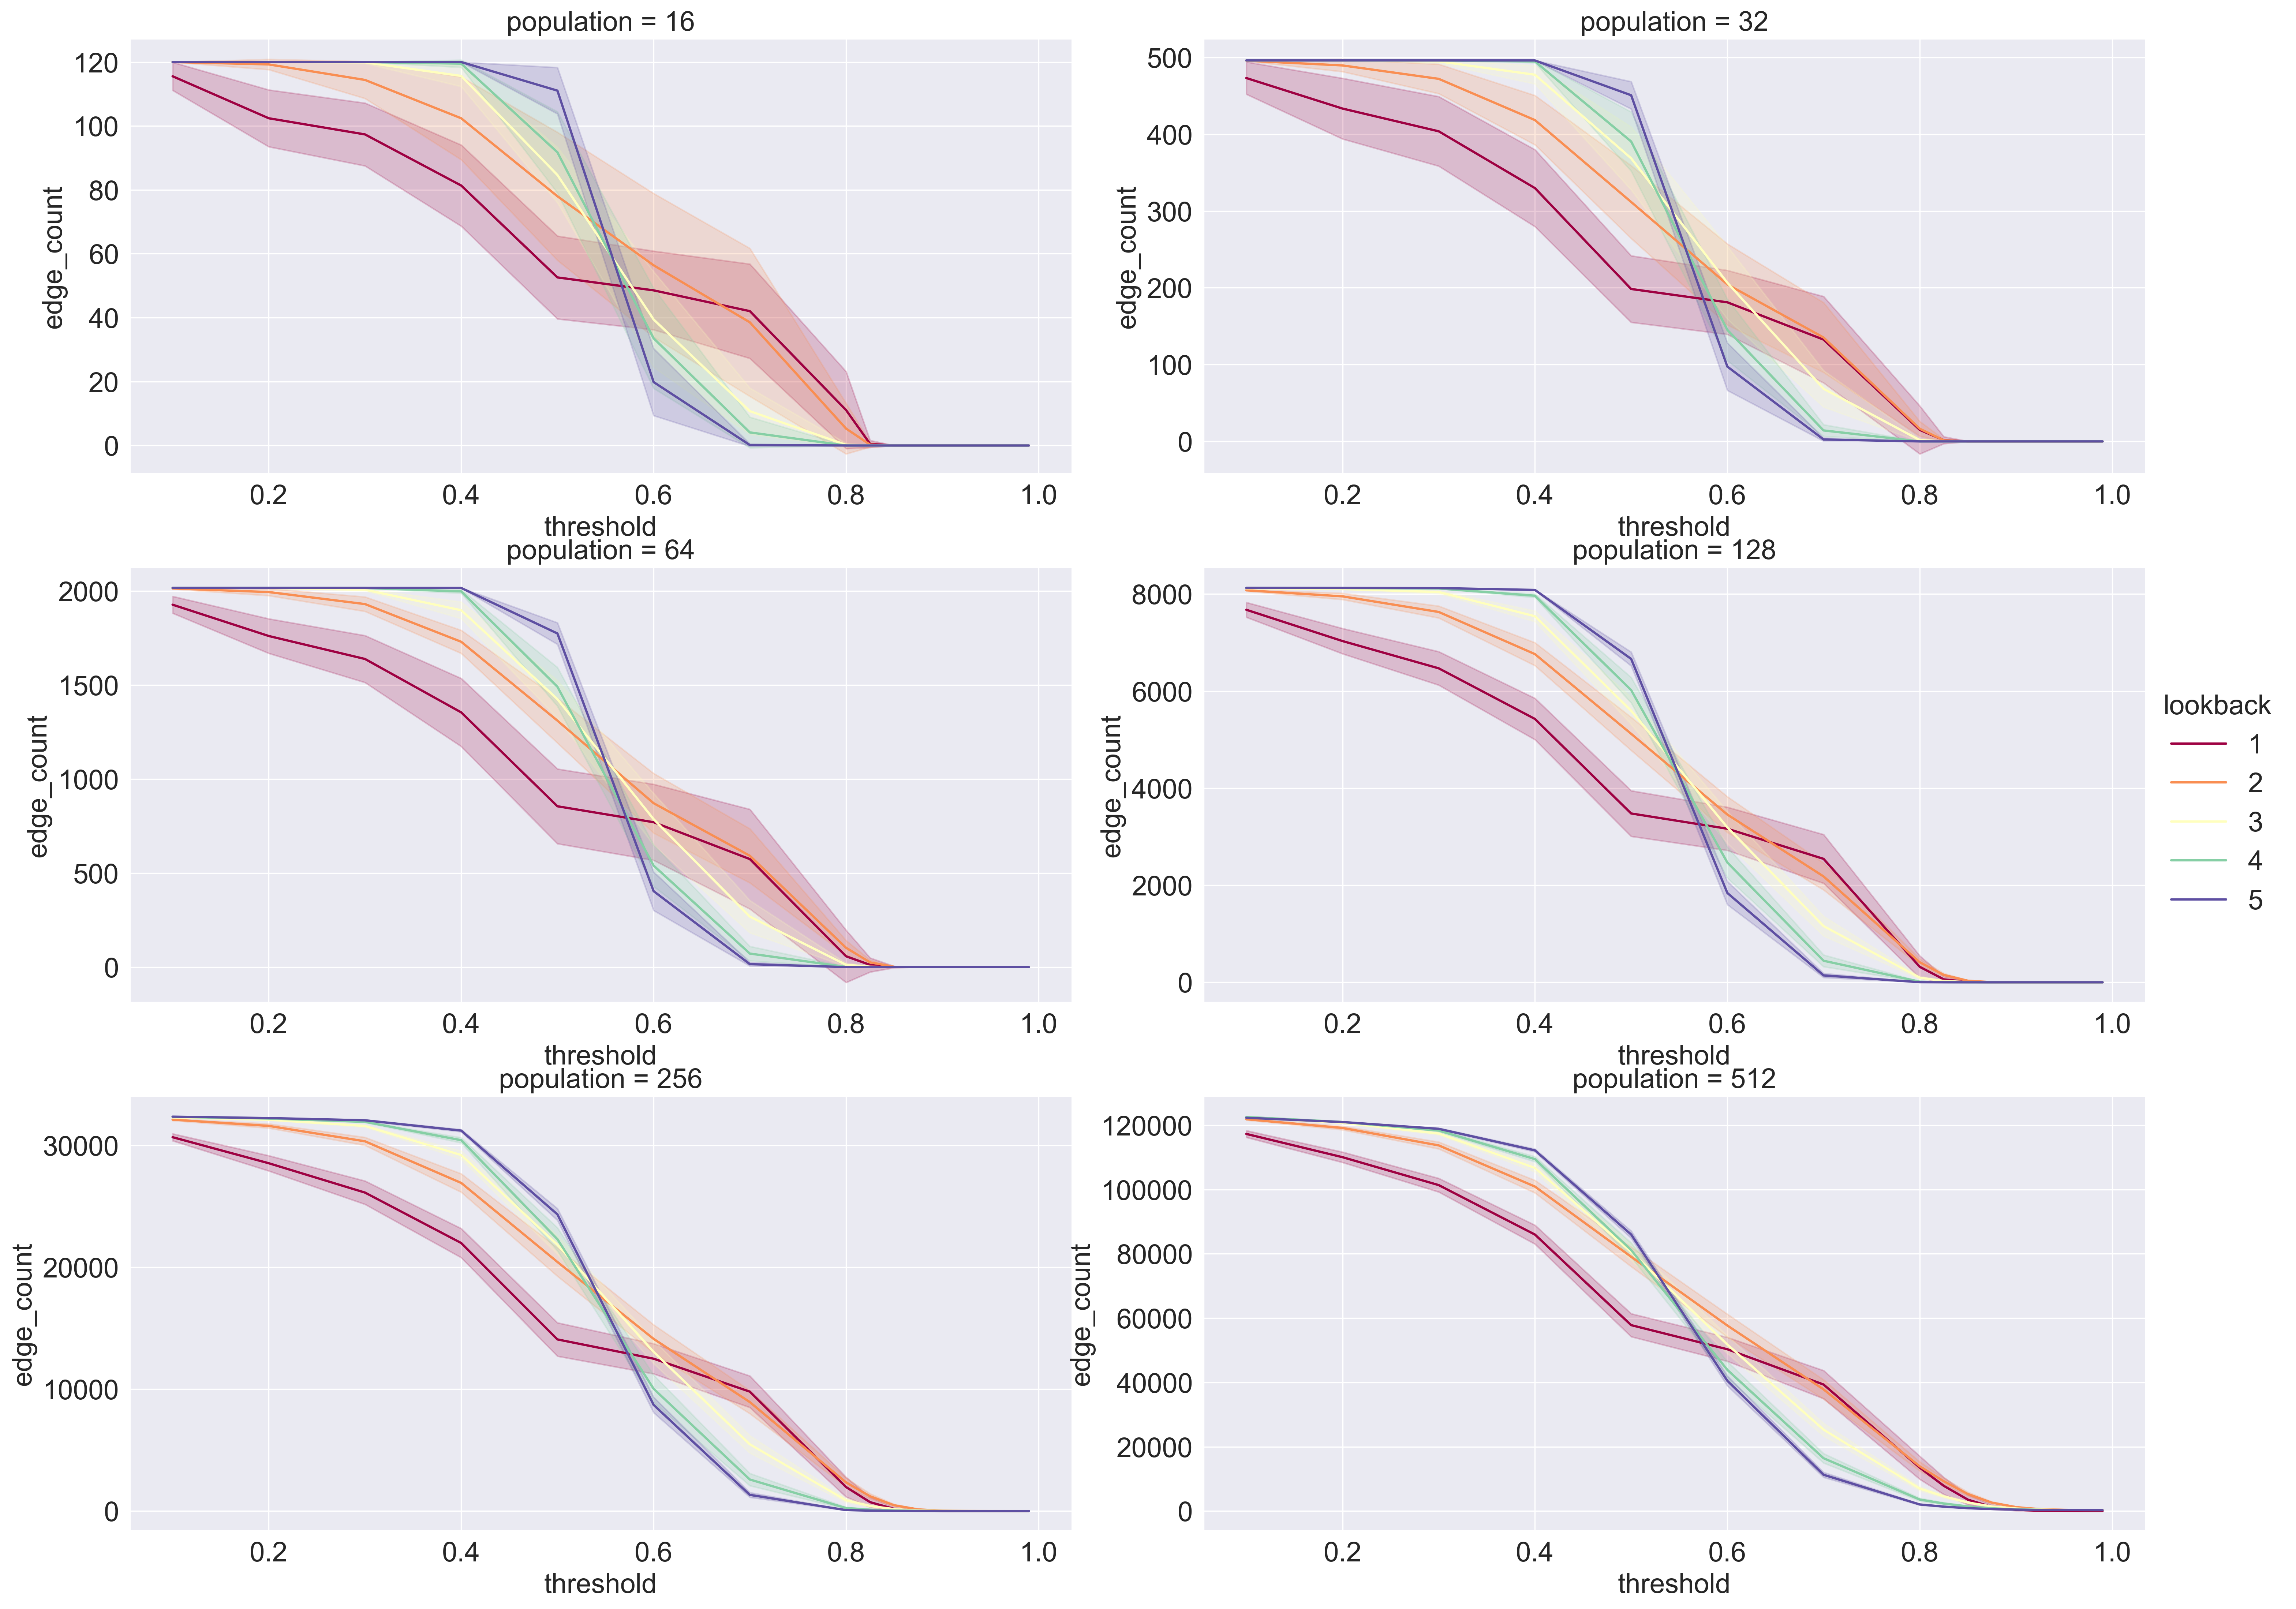

In [7]:
sns.set_style("darkgrid")
sns.relplot(
    data=df,
    x="threshold",
    y="edge_count",
    hue="lookback",
    col="population",
    col_wrap=2,
    kind="line",
    aspect=2,
    palette="Spectral",
    facet_kws={"sharey": False, "sharex": False},
    errorbar="sd",
)

In [11]:
agg_df = (
    df[df["threshold"] == 0.7]
    .groupby(["population", "lookback", "threshold"])
    .agg(
        {
            "clustering_coefficient": ["mean", "std"],
        }
    )
    .round(3)
)

agg_df

clustering_coefficient       
                                                mean    std
population lookback threshold                              
16         1        0.7                        0.906  0.088
           2        0.7                        0.718  0.173
           3        0.7                        0.424  0.271
           4        0.7                        0.303  0.334
           5        0.7                        0.000  0.000
32         1        0.7                        0.876  0.071
           2        0.7                        0.733  0.147
           3        0.7                        0.596  0.085
           4        0.7                        0.246  0.162
           5        0.7                        0.038  0.111
64         1        0.7                        0.863  0.113
           2        0.7                        0.761  0.065
           3        0.7                        0.544  0.093
           4        0.7                        0.258  0.151
           5        0.7                        0.065  0.095
128        1        0.7                        0.874  0.030
           2        0.7                        0.699  0.034
           3        0.7                        0.507  0.045
           4        0.7                        0.259  0.058
           5        0.7                        0.111  0.034
256        1        0.7                        0.807  0.039
           2        0.7                        0.658  0.029
           3        0.7                        0.455  0.038
           4        0.7                        0.264  0.036
           5        0.7                        0.136  0.018
512        1        0.7                        0.703  0.041
           2        0.7                        0.593  0.020
           3        0.7                        0.423  0.015
           4        0.7                        0.271  0.016
           5        0.7                        0.174  0.013

In [12]:
agg_df2 = agg_df.reset_index()

agg_df2.pivot("population", columns="lookback")

C:\Users\jerem\AppData\Local\Temp/ipykernel_20668/4112753822.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  agg_df2.pivot("population", columns="lookback")


threshold                     clustering_coefficient                \
                                                           mean                 
lookback           1    2    3    4    5                      1      2      3   
population                                                                      
16               0.7  0.7  0.7  0.7  0.7                  0.906  0.718  0.424   
32               0.7  0.7  0.7  0.7  0.7                  0.876  0.733  0.596   
64               0.7  0.7  0.7  0.7  0.7                  0.863  0.761  0.544   
128              0.7  0.7  0.7  0.7  0.7                  0.874  0.699  0.507   
256              0.7  0.7  0.7  0.7  0.7                  0.807  0.658  0.455   
512              0.7  0.7  0.7  0.7  0.7                  0.703  0.593  0.423   

                                                             
                            std                              
lookback        4      5      1      2      3      4      5  
population                                                   
16          0.303  0.000  0.088  0.173  0.271  0.334  0.000  
32          0.246  0.038  0.071  0.147  0.085  0.162  0.111  
64          0.258  0.065  0.113  0.065  0.093  0.151  0.095  
128         0.259  0.111  0.030  0.034  0.045  0.058  0.034  
256         0.264  0.136  0.039  0.029  0.038  0.036  0.018  
512         0.271  0.174  0.041  0.020  0.015  0.016  0.013

In [13]:
for population, row in agg_df2.pivot("population", columns="lookback").iterrows():
    print(
        population,
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["clustering_coefficient"]["mean"],
                row["clustering_coefficient"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.906 \pm 0.088$	&	$0.718 \pm 0.173$	&	$0.424 \pm 0.271$	&	$0.303 \pm 0.334$	&	$0.000 \pm 0.000$ \\
32	&	$0.876 \pm 0.071$	&	$0.733 \pm 0.147$	&	$0.596 \pm 0.085$	&	$0.246 \pm 0.162$	&	$0.038 \pm 0.111$ \\
64	&	$0.863 \pm 0.113$	&	$0.761 \pm 0.065$	&	$0.544 \pm 0.093$	&	$0.258 \pm 0.151$	&	$0.065 \pm 0.095$ \\
128	&	$0.874 \pm 0.030$	&	$0.699 \pm 0.034$	&	$0.507 \pm 0.045$	&	$0.259 \pm 0.058$	&	$0.111 \pm 0.034$ \\
256	&	$0.807 \pm 0.039$	&	$0.658 \pm 0.029$	&	$0.455 \pm 0.038$	&	$0.264 \pm 0.036$	&	$0.136 \pm 0.018$ \\
512	&	$0.703 \pm 0.041$	&	$0.593 \pm 0.020$	&	$0.423 \pm 0.015$	&	$0.271 \pm 0.016$	&	$0.174 \pm 0.013$ \\


C:\Users\jerem\AppData\Local\Temp/ipykernel_20668/339049292.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  for population, row in agg_df2.pivot("population", columns="lookback").iterrows():
